# **Retail Sales EDA in Python**

## Project Goal: Helping Retail Businesses Turn Data Into Decisions

This project is built for **retail business owners and e-commerce managers** in fashion, beauty, or electronics who want fast, actionable insights from their sales data.

Too often, I hear:  

> *“We have tons of sales data, but no time or tools to analyze it.  
> I don’t know which customers are most valuable, which products drive repeat purchases, or when to run promotions.  
> I need quick, clear insights to guide decisions without hiring a full data team.”*

This project explores a fictional retail dataset to uncover insights on customer behavior, product performance, and seasonal trends designed to help teams act faster, smarter, and with confidence.

## Business Impact Summary
- Identified high-value customer segments for targeted loyalty campaigns
- Revealed seasonal revenue peaks to guide inventory and promotion timing
- Uncovered bundling opportunities to lift revenue in low-margin months
- Delivered strategic recommendations aligned with cost-saving and growth

For those who want to explore the work on Github: 

👉 [Retail Sales EDA in Python](https://github.com/Wilfrida-Were/Retail-Sales-EDA-in-Python/blob/main/README.md)

I use the same dataset, to perform **[Retail Sales EDA in SQL](https://www.kaggle.com/code/wilfridawere/retail-sales-eda-in-sql)**

## 📑 Table of Contents
* [Code](#code)
  * [Data Cleaning](#data-cleaning)
  * [Distributions: Understanding the Data at a Glance](#distributions)
  * [Q1: Who are our most valuable customers?](#q1)
  * [Q2: How does customer age and gender influence purchasing behavior?](#q2)
  * [Q3: Which product categories drive the most revenue?](#q3)
  * [Q4: Monthly trends in sales and transactions](#q4)
  * [Q5: What are the patterns in purchase quantity per transaction?](#q5)
  * [Q6: How does pricing affect purchasing behavior?](#q6)
* [Key Insights](#key-insights)
* [Recommendations](#recommendations)
* [Client Scenario: Applying the Recommendations](#client-scenario)
* [Who Can Use This Project](#who-can-use-this-project)
* [Tech Stack](#tech-stack)
* [Workflow](#workflow)
* [Key Learnings](#key-learnings)
* [Let’s Connect](#lets-connect)

<a id="code"></a>
## 💻 Code

In [1]:
# ============================================================
# 📚 IMPORT LIBRARIES
# ============================================================

# Suppress unnecessary warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Core data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Display utilities
from IPython.display import display  # for rich DataFrame rendering in notebooks
from tabulate import tabulate         # for pretty-printing tables

In [2]:
# ============================================================
# 📂 LOAD DATASET
# ============================================================

# Load the dataset directly from Kaggle input directory
retail = pd.read_csv('/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv')

# Make a working copy to avoid modifying the raw dataset
df = retail.copy() 

# Preview the first 10 rows
display(df.head(10))

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


<a id="data-cleaning"></a>
## Data Cleaning 

In [3]:
# Preview dataset structure
print("Dataset Overview:")
df.info()  # 1000 rows and 9 columns

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
# ============================================================
# DATA CLEANING STEP 1: Fix Data Types
# ============================================================

# Convert "Date" column from object (string) to datetime
# This enables time-based analysis (monthly trends, seasonality, etc.)
df['Date'] = pd.to_datetime(df['Date'])

# Double-check the conversion worked
print("\n✅ Date column successfully converted to datetime.")
print(df['Date'].head())


✅ Date column successfully converted to datetime.
0   2023-11-24
1   2023-02-27
2   2023-01-13
3   2023-05-21
4   2023-05-06
Name: Date, dtype: datetime64[ns]


In [5]:
# ============================================================
# DATA CLEANING STEP 2: Check for Missing Values
# ============================================================

# Count missing values per column
missing_values = df.isnull().sum()

# Display results
print("\n🔍 Missing Values Check:")
print(missing_values)

# Quick check
if missing_values.sum() == 0:
    print("✅ No missing values detected.")
else:
    print("⚠️ Missing values found — need cleaning before analysis.")


🔍 Missing Values Check:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
✅ No missing values detected.


In [6]:
# ============================================================
# DATA CLEANING STEP 3: Unique Values per Column
# ============================================================
unique_counts = df.nunique()

print("\nUnique Value Counts:")
print(unique_counts)

# Quick summary for stakeholders
print("\n✅ Interpretation:")
print("- Categorical columns with fewer unique values may represent dimensions like Gender or Product Category.")
print("- High unique counts in columns like Transaction ID or Customer ID confirm identifiers.")
print("- Helps decide which columns are categorical vs. continuous.")


Unique Value Counts:
Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

✅ Interpretation:
- Categorical columns with fewer unique values may represent dimensions like Gender or Product Category.
- High unique counts in columns like Transaction ID or Customer ID confirm identifiers.
- Helps decide which columns are categorical vs. continuous.


From the output above:

* There are 1000 distinct Transaction IDs and 1000 distinct Customers (Customer ID)s
* Since there are only 345 unique dates, some customers likely made purchases on the same dates
* The Product categories are only *Beauty*, *Clothing* and *Electronics*

<a id="distributions"></a>
## 📊 Distributions: Understanding the Data at a Glance  

📌 Dataset-Level KPIs
Total Revenue: $456,000.00
Total Transactions: 1000
Average Transaction Value: $456.00
Age Range: 18 - 64
Price per Unit Range: $25.00 - $500.00
Transaction Amount Range: $25.00 - $2000.00



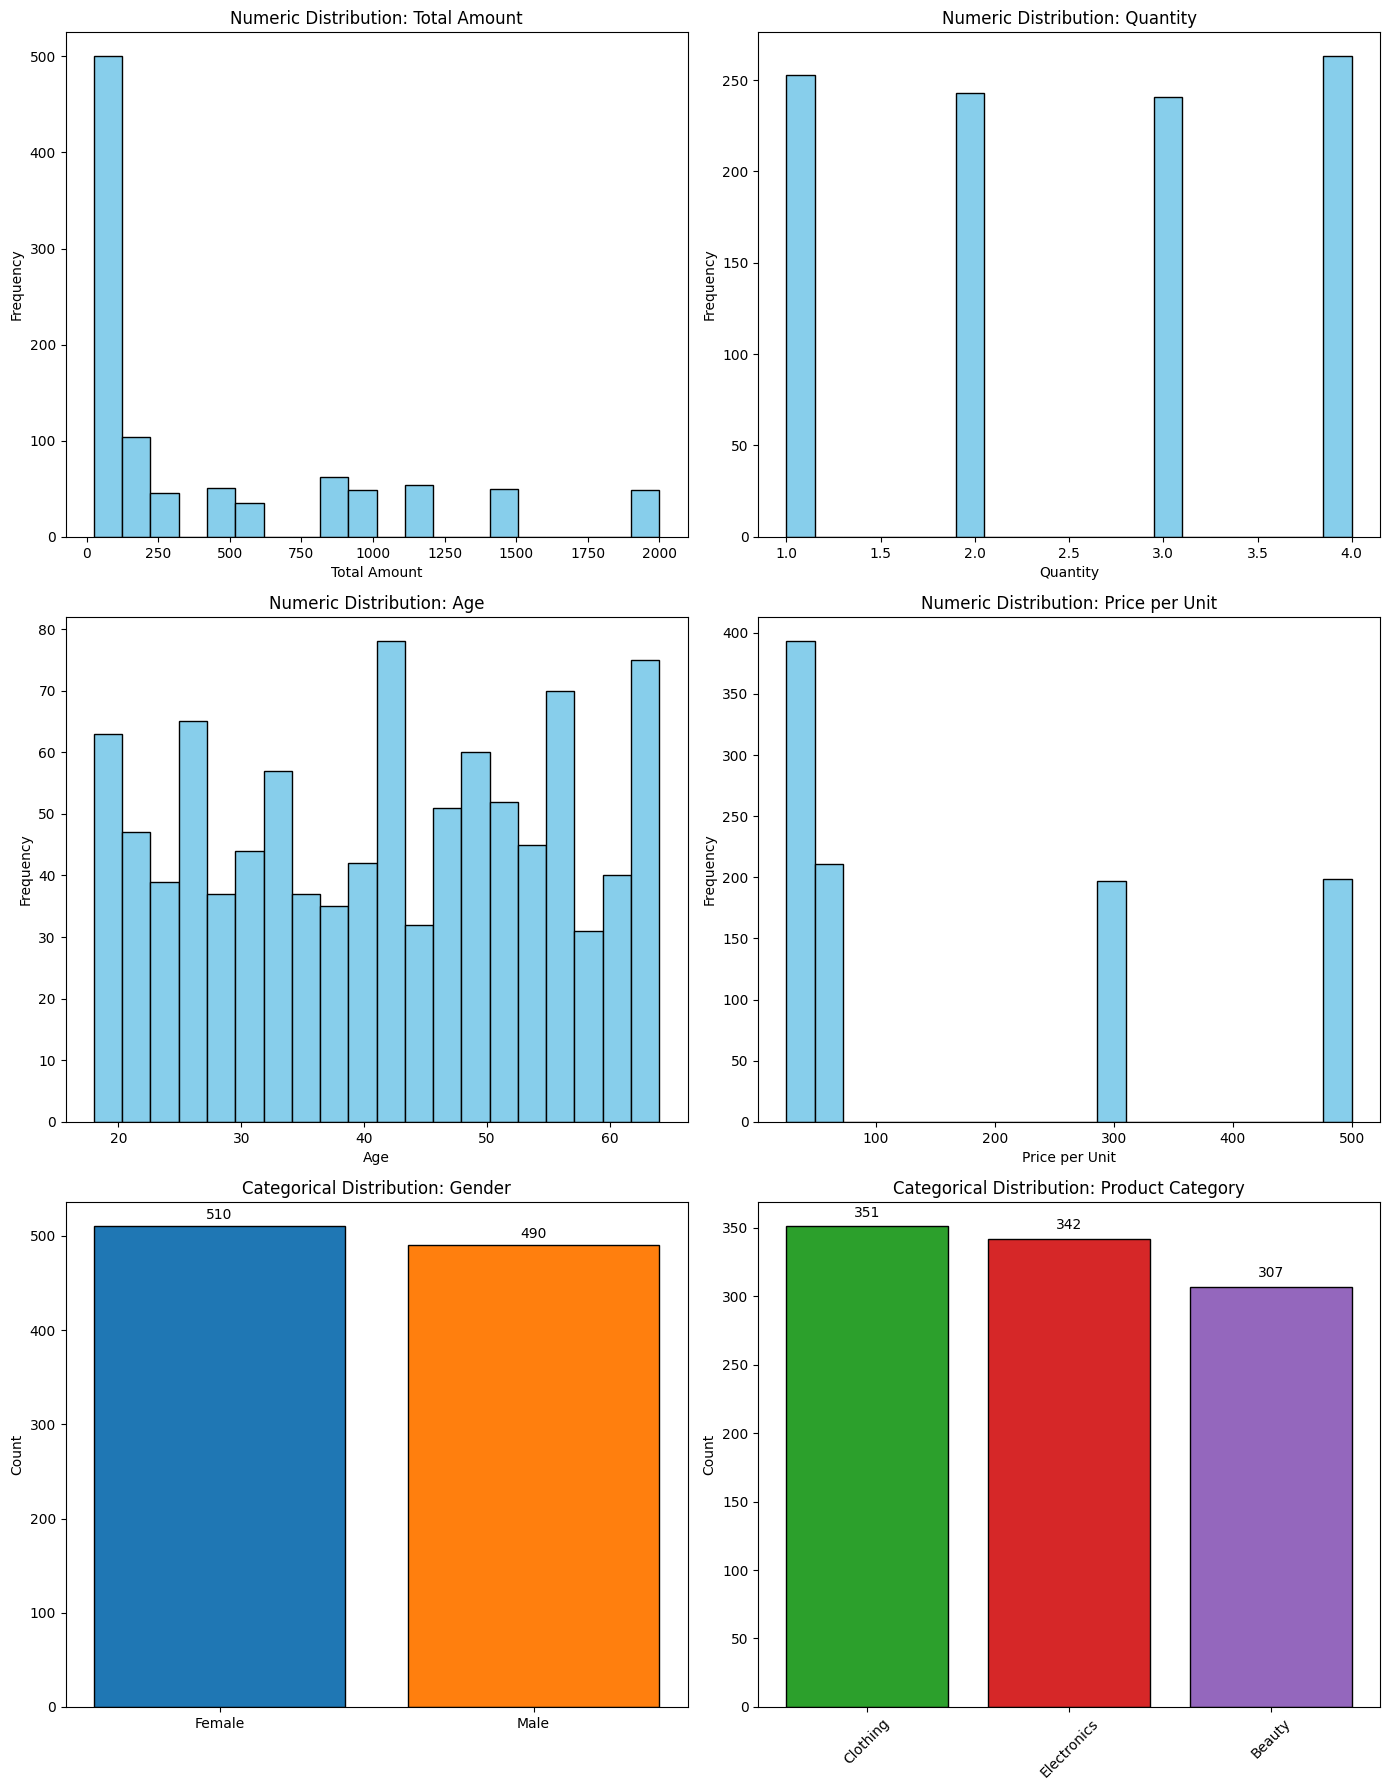

In [7]:
# ===================================================
# 📊 KPI CALCULATIONS
# Purpose: Summarize key metrics to understand overall business performance
# ===================================================
total_revenue = df['Total Amount'].sum()
total_transactions = df['Transaction ID'].nunique()
avg_transaction_value = df['Total Amount'].mean()

# Get ranges for customer demographics & spending
min_age = df['Age'].min()
max_age = df['Age'].max()
min_price_per_unit = df['Price per Unit'].min()
max_price_per_unit = df['Price per Unit'].max()
min_transaction_amount = df.groupby('Transaction ID')['Total Amount'].sum().min()
max_transaction_amount = df.groupby('Transaction ID')['Total Amount'].sum().max()

# Print KPIs
print("📌 Dataset-Level KPIs")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Transactions: {total_transactions}")
print(f"Average Transaction Value: ${avg_transaction_value:,.2f}")
print(f"Age Range: {min_age} - {max_age}")
print(f"Price per Unit Range: ${min_price_per_unit:.2f} - ${max_price_per_unit:.2f}")
print(f"Transaction Amount Range: ${min_transaction_amount:.2f} - ${max_transaction_amount:.2f}")
print()

# ===================================================
# 📊 DISTRIBUTIONS: Understanding the Data at a Glance
# Purpose: Explore numeric and categorical distributions to spot patterns
# ===================================================

# --- COLUMN GROUPING ---
numeric_cols = ['Total Amount', 'Quantity', 'Age', 'Price per Unit']
categorical_cols = ['Gender', 'Product Category']

# --- PLOTTING DISTRIBUTIONS ---
total_plots = len(numeric_cols) + len(categorical_cols)
cols = 2
rows = (total_plots + 1) // cols

plt.figure(figsize=(14, 6*rows))

# Numeric distributions (histograms)
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Numeric Distribution: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Categorical: Gender
# Gender with different colors
plt.subplot(rows, cols, len(numeric_cols)+1)
gender_counts = df['Gender'].value_counts()
colors = ['#1f77b4', '#ff7f0e']  # Blue for Male, Orange for Female (adjust as needed)
bars = plt.bar(gender_counts.index, gender_counts.values, color=colors, edgecolor='black')
plt.title('Categorical Distribution: Gender')
plt.ylabel('Count')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(int(height)), ha='center', va='bottom')

# Categorical: Product Category
plt.subplot(rows, cols, len(numeric_cols)+2)
product_counts = df['Product Category'].value_counts()
colors = ['#2ca02c', '#d62728', '#9467bd']  # Different colors per category
bars = plt.bar(product_counts.index, product_counts.values, color=colors, edgecolor='black')
plt.title('Categorical Distribution: Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

<a id="q1"></a>
## Q1: Who are our most valuable customers?

Table 1: Top 10 Customers by Revenue


,Customer ID,Gender,Age,Top_Product_Category,Total_Transactions,Total_Quantity,Total_Revenue,Avg_Transaction_Value
487,CUST487,Male,44,Clothing,1,4,2000,2000.0
476,CUST476,Female,27,Clothing,1,4,2000,2000.0
773,CUST773,Male,25,Electronics,1,4,2000,2000.0
503,CUST503,Male,45,Beauty,1,4,2000,2000.0
92,CUST093,Female,35,Beauty,1,4,2000,2000.0
88,CUST089,Female,55,Electronics,1,4,2000,2000.0
946,CUST946,Male,62,Electronics,1,4,2000,2000.0
157,CUST157,Male,62,Electronics,1,4,2000,2000.0
155,CUST155,Male,31,Electronics,1,4,2000,2000.0
420,CUST420,Female,22,Clothing,1,4,2000,2000.0


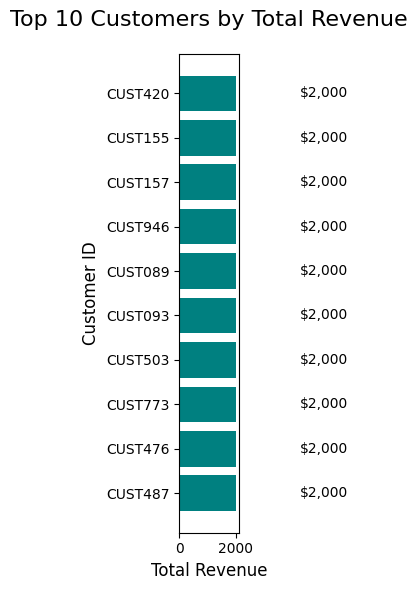

In [8]:
# ===================================================
# Q1: Who are our most valuable customers?
# Purpose: Identify top customers by revenue and analyze their profile & purchasing behavior
# ===================================================

# Step 1: Summarize revenue & transaction stats per customer
customer_summary = df.groupby('Customer ID').agg(
    Total_Revenue=('Total Amount', 'sum'),
    Total_Transactions=('Transaction ID', 'nunique'),
    Avg_Transaction_Value=('Total Amount', 'mean'),
    Total_Quantity=('Quantity', 'sum'),
    Age=('Age', 'first'),  # Assuming age is same per customer
    Gender=('Gender', 'first'),  # Assuming gender is same per customer
    Top_Product_Category=('Product Category', lambda x: x.mode()[0])  # Most frequent product category
).reset_index()

# Step 2: Extract top 10 customers by revenue
top_customers = customer_summary.sort_values(by='Total_Revenue', ascending=False).head(10)

# Step 3: Display top customers in a table
print("Table 1: Top 10 Customers by Revenue")
display(top_customers[['Customer ID', 'Gender', 'Age', 'Top_Product_Category', 
                       'Total_Transactions', 'Total_Quantity', 'Total_Revenue', 'Avg_Transaction_Value']])

# Step 4: Visualize with a horizontal bar chart
top_customers_sorted = top_customers.sort_values(by='Total_Revenue', ascending=True)

fig, ax = plt.subplots(figsize=(12,6))
bars = ax.barh(
    top_customers_sorted['Customer ID'],
    top_customers_sorted['Total_Revenue'],
    color='teal'
)

# Add labels showing revenue value at bar ends
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + total_revenue*0.005,
        bar.get_y() + bar.get_height()/2,
        f"${width:,.0f}",
        ha='left',
        va='center',
        fontsize=10
    )

ax.set_title('Top 10 Customers by Total Revenue', fontsize=16, pad=20)
ax.set_xlabel('Total Revenue', fontsize=12)
ax.set_ylabel('Customer ID', fontsize=12)
plt.tight_layout()
plt.show()

<a id="q2"></a>
## Q2: How does customer age and gender influence purchasing behavior?

Table 2A: Top 10 Ages by Total Revenue


,Age,Total_Revenue,Total_Transactions,Avg_Transaction_Value,Num_Customers
25,43,17970,31,579.677419,31
16,34,16785,28,599.464286,28
33,51,16065,30,535.500000,30
1,19,14870,21,708.095238,21
8,26,13980,22,635.454545,22
4,22,13700,27,507.407407,27
28,46,13090,25,523.600000,25
3,21,12585,20,629.250000,20
29,47,12505,26,480.961538,26
19,37,11650,16,728.125000,16


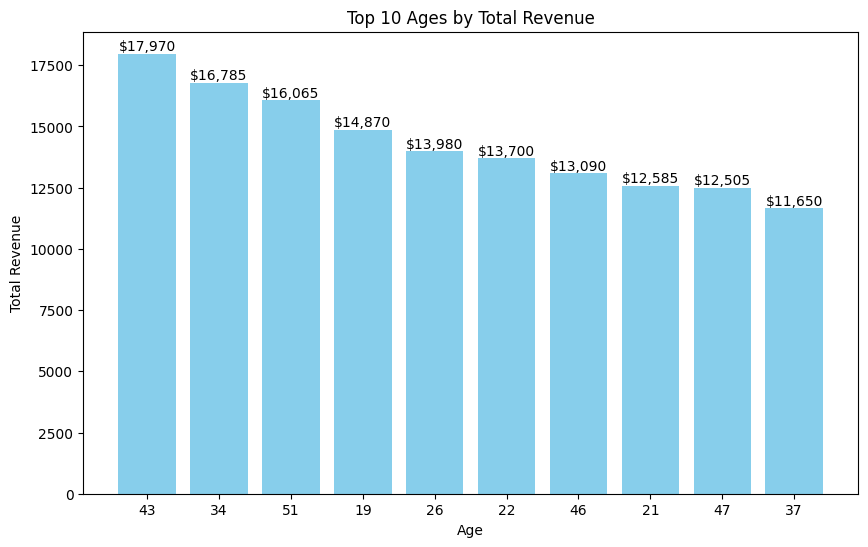


Table 2B: Spending Summary by Gender


,Gender,Total_Revenue,Total_Transactions,Avg_Transaction_Value,Num_Customers
0,Female,232840,510,456.549020,510
1,Male,223160,490,455.428571,490


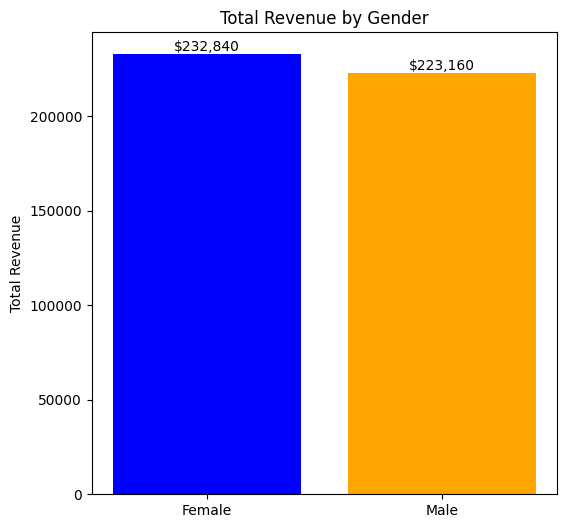


Table 2C: Top Age & Gender Combinations by Total Revenue


,Age,Gender,Total_Revenue,Total_Transactions,Avg_Transaction_Value,Num_Customers
32,34,Female,12050,14,860.714286,14
16,26,Female,10375,15,691.666667,15
50,43,Female,10260,19,540.000000,19
67,51,Male,8795,13,676.538462,13
9,22,Male,8275,13,636.538462,13
27,31,Male,8200,16,512.500000,16
91,63,Male,8045,11,731.363636,11
0,18,Female,7940,13,610.769231,13
57,46,Male,7710,9,856.666667,9
51,43,Male,7710,12,642.500000,12


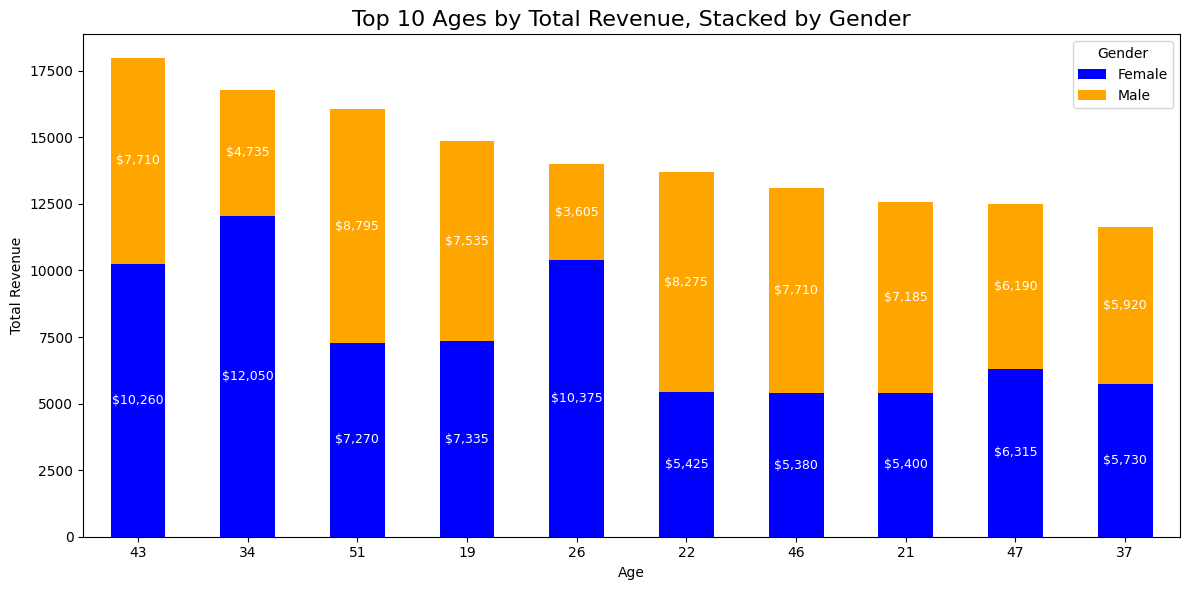

In [9]:
# ===================================================
# Q2: How does customer age and gender influence purchasing behavior?
# Purpose: Explore spending patterns by age, gender, and their combination
# ===================================================

# -----------------------------
# 2A. Total Spending by Age
# -----------------------------
# Step 1: Aggregate revenue and transactions by age
age_summary = df.groupby('Age').agg(
    Total_Revenue=('Total Amount', 'sum'),
    Total_Transactions=('Transaction ID', 'nunique'),
    Avg_Transaction_Value=('Total Amount', 'mean'),
    Num_Customers=('Customer ID', 'nunique')
).reset_index()

# Step 2: Extract top 10 ages by revenue
top_age_summary = age_summary.sort_values(by='Total_Revenue', ascending=False).head(10)

# Step 3: Display table
print("Table 2A: Top 10 Ages by Total Revenue")
display(top_age_summary)

# Step 4: Visualize with bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(top_age_summary['Age'].astype(str), top_age_summary['Total_Revenue'], color='skyblue')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}", ha='center', va='bottom', fontsize=10)
plt.title('Top 10 Ages by Total Revenue')
plt.xlabel('Age')
plt.ylabel('Total Revenue')
plt.show()


# -----------------------------
# 2B. Total Spending by Gender
# -----------------------------
# Step 1: Aggregate revenue and transactions by gender
gender_summary = df.groupby('Gender').agg(
    Total_Revenue=('Total Amount', 'sum'),
    Total_Transactions=('Transaction ID', 'nunique'),
    Avg_Transaction_Value=('Total Amount', 'mean'),
    Num_Customers=('Customer ID', 'nunique')
).reset_index()

# Step 2: Display table
print("\nTable 2B: Spending Summary by Gender")
display(gender_summary)

# Step 3: Visualize with bar chart
plt.figure(figsize=(6,6))
colors = ['blue' if g=='Female' else 'orange' for g in gender_summary['Gender']]
bars = plt.bar(gender_summary['Gender'], gender_summary['Total_Revenue'], color=colors)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}", ha='center', va='bottom', fontsize=10)
plt.title('Total Revenue by Gender')
plt.ylabel('Total Revenue')
plt.show()


# -----------------------------
# 2C. Spending by Age & Gender (Stacked Bar)
# -----------------------------
# Step 1: Aggregate by age + gender
age_gender_summary = df.groupby(['Age','Gender']).agg(
    Total_Revenue=('Total Amount', 'sum'),
    Total_Transactions=('Transaction ID', 'nunique'),
    Avg_Transaction_Value=('Total Amount', 'mean'),
    Num_Customers=('Customer ID', 'nunique')
).reset_index()

# Step 2: Show top 10 age-gender combos by revenue
print("\nTable 2C: Top Age & Gender Combinations by Total Revenue")
top_age_gender_table = age_gender_summary.sort_values(by='Total_Revenue', ascending=False).head(10)
display(top_age_gender_table)

# Step 3: Prepare data for stacked bar chart
stacked_data = age_gender_summary.pivot(index='Age', columns='Gender', values='Total_Revenue')
top_ages = stacked_data.sum(axis=1).sort_values(ascending=False).head(10).index
stacked_data_top = stacked_data.loc[top_ages]

# Step 4: Visualize stacked bar chart
fig, ax = plt.subplots(figsize=(12,6))
stacked_data_top.plot(kind='bar', stacked=True, ax=ax, color=['blue', 'orange'])

# Add labels inside the bars
for i, age in enumerate(stacked_data_top.index):
    bottom = 0
    for gender in stacked_data_top.columns:
        val = stacked_data_top.loc[age, gender]
        ax.text(i, bottom + val/2, f"${val:,.0f}", ha='center', va='center', fontsize=9, color='white')
        bottom += val

ax.set_title('Top 10 Ages by Total Revenue, Stacked by Gender', fontsize=16)
ax.set_xlabel('Age')
ax.set_ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<a id="q3"></a>
## Q3: Which product categories drive the most revenue?

Table 3A: Revenue, Number of Customers, and Average Transaction Value per Product Category


,Product Category,Total_Revenue,Number_of_Customers,Avg_Transaction_Value
2,Electronics,156905,342,458.786550
1,Clothing,155580,351,443.247863
0,Beauty,143515,307,467.475570


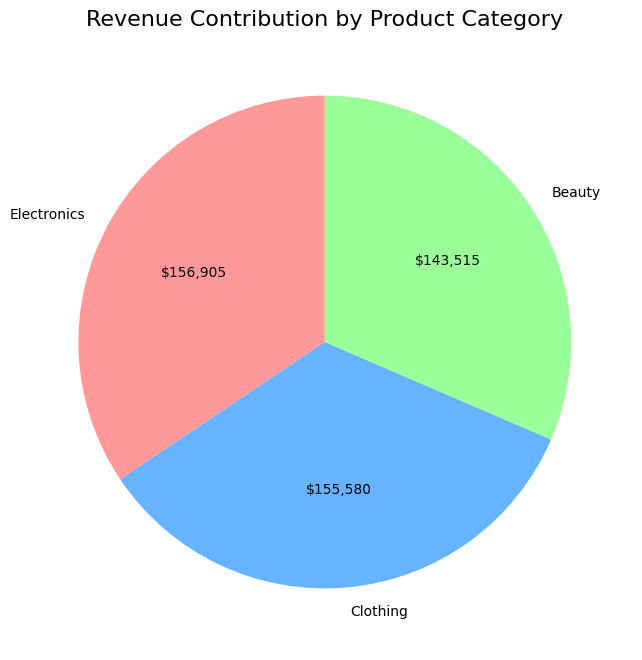

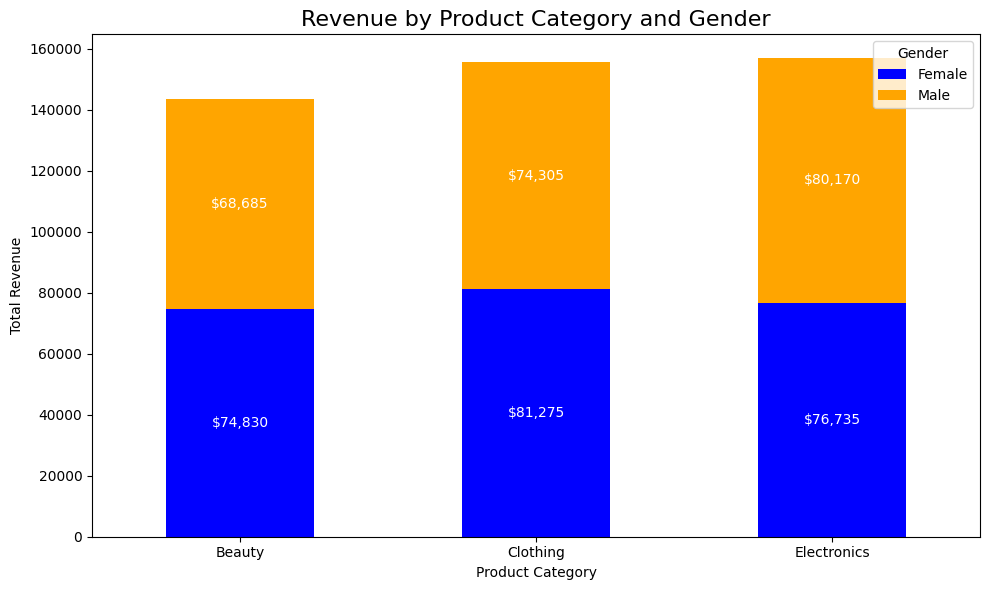


Table 3B: Revenue, Number of Customers, and Average Transaction Value by Product Category & Gender


,Product Category,Gender,Total_Revenue,Number_of_Customers,Avg_Transaction_Value
2,Clothing,Female,81275,174,467.097701
5,Electronics,Male,80170,172,466.104651
4,Electronics,Female,76735,170,451.382353
0,Beauty,Female,74830,166,450.783133
3,Clothing,Male,74305,177,419.802260
1,Beauty,Male,68685,141,487.127660



Table 3C: Top 3 Age & Gender Combinations by Revenue per Product


,Product Category,Age,Gender,Total_Revenue,Number_of_Customers
0,Beauty,46,Male,6160,6
1,Beauty,34,Female,5350,7
2,Beauty,21,Male,4700,4
3,Clothing,26,Female,6960,7
4,Clothing,64,Female,4735,10
5,Clothing,43,Female,4175,7
6,Electronics,63,Male,5675,7
7,Electronics,34,Female,5400,5
8,Electronics,43,Male,5350,5


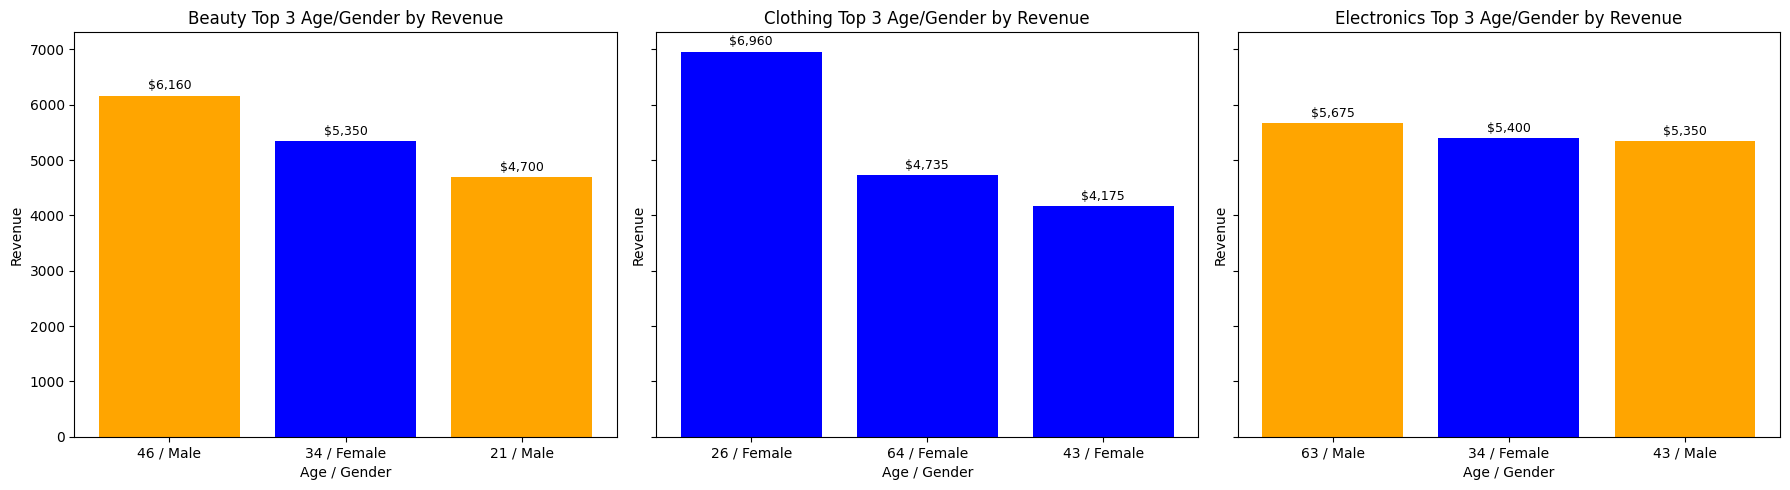

In [10]:
# ===================================================
# Q3: Which product categories drive the most revenue?
# Purpose: Identify top revenue-generating products and analyze by gender/age
# ===================================================

# -----------------------------
# 3A. Revenue & Number of Customers per Product Category
# -----------------------------
# Step 1: Aggregate revenue, customer count, and average transaction value per product
product_summary = df.groupby('Product Category').agg(
    Total_Revenue=('Total Amount', 'sum'),
    Number_of_Customers=('Customer ID', 'nunique'),
    Avg_Transaction_Value=('Total Amount','mean')
).reset_index()

# Step 2: Sort categories by revenue
product_summary = product_summary.sort_values(by='Total_Revenue', ascending=False)

# Step 3: Display summary table
print("Table 3A: Revenue, Number of Customers, and Average Transaction Value per Product Category")
display(product_summary)

# Step 4: Visualize revenue distribution as a pie chart
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(
    product_summary['Total_Revenue'],
    labels=product_summary['Product Category'],
    autopct=lambda p: f"${p*product_summary['Total_Revenue'].sum()/100:,.0f}",
    colors=['#ff9999','#66b3ff','#99ff99'],
    startangle=90
)
ax.set_title('Revenue Contribution by Product Category', fontsize=16)
plt.show()

# -----------------------------
# 3B. Revenue by Product Category & Gender
# -----------------------------
# Step 1: Aggregate revenue and customer count per product & gender
product_gender_summary = df.groupby(['Product Category','Gender']).agg(
    Total_Revenue=('Total Amount','sum'),
    Number_of_Customers=('Customer ID','nunique'),
    Avg_Transaction_Value=('Total Amount','mean')
).reset_index()

# Step 2: Pivot for stacked bar chart
stacked_product_gender = product_gender_summary.pivot(index='Product Category', columns='Gender', values='Total_Revenue')

# Step 3: Visualize revenue split by gender for each product
fig, ax = plt.subplots(figsize=(10,6))
stacked_product_gender.plot(kind='bar', stacked=True, ax=ax, color=['blue','orange'])

# Add labels inside bars
for i, product in enumerate(stacked_product_gender.index):
    bottom = 0
    for gender in stacked_product_gender.columns:
        val = stacked_product_gender.loc[product, gender]
        ax.text(i, bottom + val/2, f"${val:,.0f}", ha='center', va='center', fontsize=10, color='white')
        bottom += val

ax.set_title('Revenue by Product Category and Gender', fontsize=16)
ax.set_ylabel('Total Revenue')
ax.set_xlabel('Product Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Display table with heading
print()
print("Table 3B: Revenue, Number of Customers, and Average Transaction Value by Product Category & Gender")
display(product_gender_summary.sort_values(by='Total_Revenue', ascending=False))

# -----------------------------
# 3C. Top 3 Age & Gender Combinations per Product
# -----------------------------
# Step 1: Aggregate revenue per product, age, and gender
age_gender_product_summary = df.groupby(['Product Category','Age','Gender']).agg(
    Total_Revenue=('Total Amount','sum'),
    Number_of_Customers=('Customer ID','nunique')
).reset_index()

# Step 2: Extract top 3 age/gender combos for each product
top3_age_gender_per_product = age_gender_product_summary.groupby('Product Category').apply(
    lambda x: x.sort_values(by='Total_Revenue', ascending=False).head(3)
).reset_index(drop=True)

# Step 3: Display table
print()
print("Table 3C: Top 3 Age & Gender Combinations by Revenue per Product")
display(top3_age_gender_per_product.sort_values(by=['Product Category','Total_Revenue'], ascending=[True, False]))

# Step 4: Grouped bar chart per product
fig, axs = plt.subplots(1, 3, figsize=(18,5), sharey=True)

for i, product in enumerate(top3_age_gender_per_product['Product Category'].unique()):
    data = top3_age_gender_per_product[top3_age_gender_per_product['Product Category']==product]
    labels = data['Age'].astype(str) + ' / ' + data['Gender']
    axs[i].bar(labels, data['Total_Revenue'], color=['blue' if g=='Female' else 'orange' for g in data['Gender']])
    axs[i].set_title(f"{product} Top 3 Age/Gender by Revenue")
    axs[i].set_xlabel('Age / Gender')
    axs[i].set_ylabel('Revenue')
    for idx, val in enumerate(data['Total_Revenue']):
        axs[i].text(idx, val + val*0.01, f"${val:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

<a id="q4"></a>
## Q4: Monthly trends in sales and transactions

Table 4: Monthly Sales Table


,Month,Total_Revenue,Total_Transactions,Avg_Transaction_Value
0,1,36980,78,474.102564
1,2,44060,85,518.352941
2,3,28990,73,397.123288
3,4,33870,86,393.837209
4,5,53150,105,506.190476
5,6,36715,77,476.818182
6,7,35465,72,492.569444
7,8,36960,94,393.191489
8,9,23620,65,363.384615
9,10,46580,96,485.208333


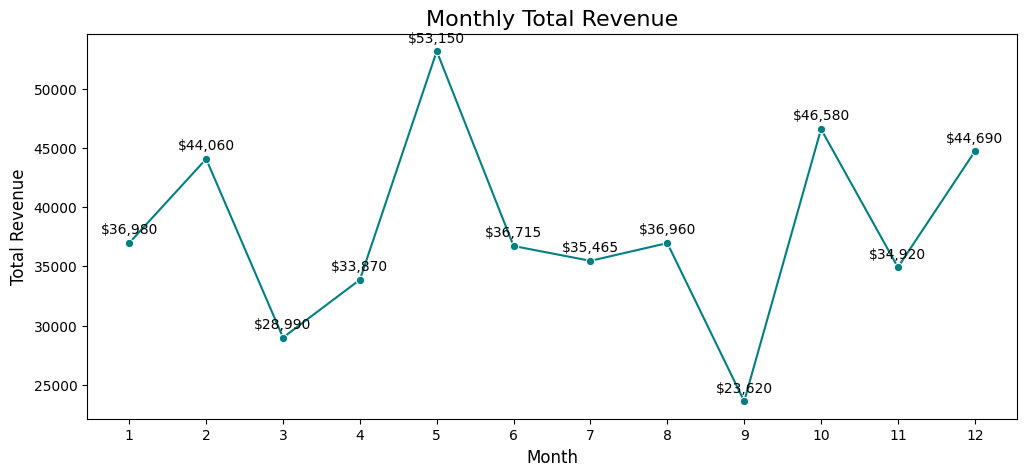

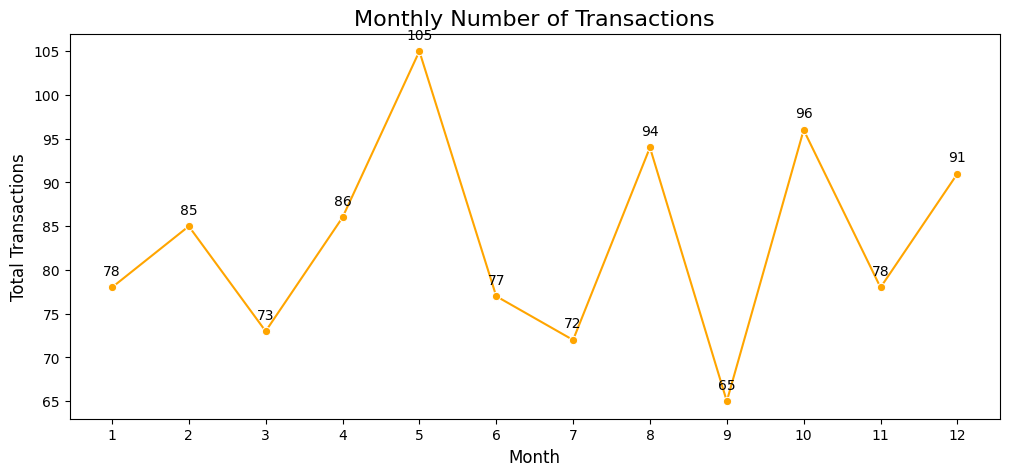

In [11]:
# ===================================================
# Q4: Monthly trends in sales and transactions
# Purpose: Identify seasonality patterns in revenue and transactions
# ===================================================

# -----------------------------
# 4A. Aggregate Monthly Sales Metrics
# -----------------------------
# Step 1: Extract month from transaction date
df['Month'] = df['Date'].dt.month

# Step 2: Aggregate revenue & transactions by month
monthly_sales = df.groupby('Month').agg(
    Total_Revenue=('Total Amount', 'sum'),
    Total_Transactions=('Transaction ID', 'nunique')
).reset_index()

# Step 3: Compute average transaction value
monthly_sales['Avg_Transaction_Value'] = monthly_sales['Total_Revenue'] / monthly_sales['Total_Transactions']

# Display table
print("Table 4: Monthly Sales Table")
display(monthly_sales)

# Monthly Revenue Line Chart
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Revenue', marker='o', color='teal')
plt.title('Monthly Total Revenue', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(monthly_sales['Month'])
plt.grid(False)

# Add data labels on each point
for x, y in zip(monthly_sales['Month'], monthly_sales['Total_Revenue']):
    plt.text(x, y + monthly_sales['Total_Revenue'].max()*0.01, f"${y:,.0f}", ha='center', va='bottom', fontsize=10)

plt.show()

# Monthly Transactions Line Chart
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Transactions', marker='o', color='orange')
plt.title('Monthly Number of Transactions', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.xticks(monthly_sales['Month'])
plt.grid(False)

# Add data labels on each point
for x, y in zip(monthly_sales['Month'], monthly_sales['Total_Transactions']):
    plt.text(x, y + monthly_sales['Total_Transactions'].max()*0.01, f"{y}", ha='center', va='bottom', fontsize=10)

plt.show()

<a id="q5"></a>
## Q5: What are the patterns in purchase quantity per transaction?

Average Quantity per Transaction: 2.51

Table 5A: Average Quantity per Transaction by Product Category:


,Product Category,Quantity
0,Beauty,2.511401
1,Clothing,2.547009
2,Electronics,2.482456


Table 5B: Average Quantity per Transaction by Product and Month


Product Category,Beauty,Clothing,Electronics
Month,,,
1,2.38,2.77,2.50
2,2.62,2.27,2.73
3,2.43,2.92,2.29
4,2.38,2.58,2.48
5,2.32,2.62,2.42
6,2.64,2.39,2.67
7,2.59,2.37,2.35
8,2.58,2.44,2.29
9,2.50,3.00,2.40


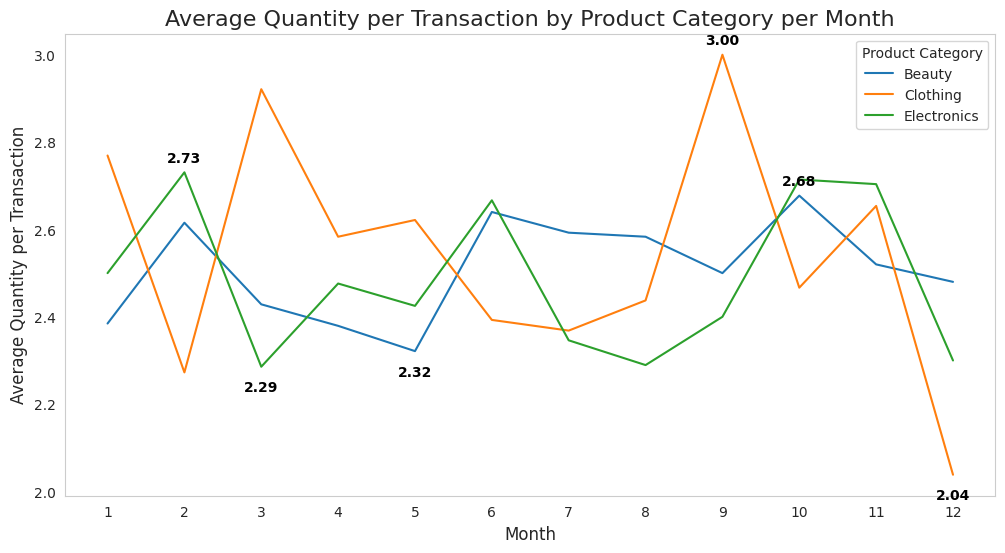

In [12]:
# Set seaborn style for simplicity
sns.set_style("whitegrid")

# ------------------------------
### 5A: Average Quantity per Transaction
# ------------------------------
avg_quantity = df['Quantity'].mean()
print(f"Average Quantity per Transaction: {avg_quantity:.2f}")

# Optional: average quantity by product category
avg_quantity_by_product = df.groupby('Product Category')['Quantity'].mean().reset_index()
print()
print("Table 5A: Average Quantity per Transaction by Product Category:")
display(avg_quantity_by_product)

# ------------------------------
### 5B: Average Quantity per Transaction by Product and Month
# ------------------------------

# Group by Month & Product Category
avg_qty_month_product = df.groupby(['Month','Product Category']).agg(
    Avg_Quantity=('Quantity', 'mean')
).reset_index()

# Pivot table: Months as rows, Products as columns, values = Avg_Quantity
avg_qty_pivot = avg_qty_month_product.pivot(
    index='Month',
    columns='Product Category',
    values='Avg_Quantity'
)

# Fill missing values with 0 (if any) and round to 2 decimals
avg_qty_pivot = avg_qty_pivot.fillna(0).round(2)

print("Table 5B: Average Quantity per Transaction by Product and Month")
display(avg_qty_pivot)

# ------------------------------
# Multi-line chart
# ------------------------------
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

for product in avg_qty_month_product['Product Category'].unique():
    product_data = avg_qty_month_product[avg_qty_month_product['Product Category'] == product]
    
    # Plot line without markers
    plt.plot(product_data['Month'], product_data['Avg_Quantity'], label=product)
    
    # Annotate highest point
    max_idx = product_data['Avg_Quantity'].idxmax()
    max_month = product_data.loc[max_idx, 'Month']
    max_val = product_data.loc[max_idx, 'Avg_Quantity']
    plt.annotate(f"{max_val:.2f}", 
                 xy=(max_month, max_val),
                 xytext=(0, 5), 
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='black',
                 fontweight='bold')
    
    # Annotate lowest point
    min_idx = product_data['Avg_Quantity'].idxmin()
    min_month = product_data.loc[min_idx, 'Month']
    min_val = product_data.loc[min_idx, 'Avg_Quantity']
    plt.annotate(f"{min_val:.2f}", 
                 xy=(min_month, min_val),
                 xytext=(0, -10), 
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='black',
                 fontweight='bold')

plt.title('Average Quantity per Transaction by Product Category per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Quantity per Transaction', fontsize=12)
plt.xticks(range(1,13))
plt.legend(title='Product Category')
plt.grid(False)
plt.show()

<a id="q6"></a>
## Q6: How does pricing affect purchasing behavior?

In [13]:
# ------------------------------
# Table 6A: Pricing Summary
# ------------------------------
price_summary = df.groupby('Price per Unit').agg(
    Total_Revenue=('Total Amount', 'sum'),
    Total_Transactions=('Transaction ID', 'nunique'),
    Avg_Quantity=('Quantity', 'mean')
).reset_index()

# Display table heading
print("Table 6A: Pricing Summary Table")
display(price_summary)

# ------------------------------
# Table 6B: Pivoted Pricing by Product
# ------------------------------
# Aggregate metrics by Price per Unit and Product Category
price_product_summary = df.groupby(['Price per Unit', 'Product Category']).agg(
    Total_Revenue=('Total Amount', 'sum'),
    Total_Transactions=('Transaction ID', 'nunique'),
    Avg_Quantity=('Quantity', 'mean')
).reset_index()

# Pivot table for Total Revenue
revenue_pivot = price_product_summary.pivot(index='Price per Unit', columns='Product Category', values='Total_Revenue')
revenue_pivot = revenue_pivot.fillna(0)  # fill missing values
revenue_pivot = revenue_pivot.applymap(lambda x: f"${x:,.0f}")  # format as currency

print()
print("Table 6B: Total Revenue per Product by Price")
display(revenue_pivot)

Table 6A: Pricing Summary Table


,Price per Unit,Total_Revenue,Total_Transactions,Avg_Quantity
0,25,13050,210,2.485714
1,30,13350,183,2.431694
2,50,26700,211,2.530806
3,300,155400,197,2.629442
4,500,247500,199,2.487437



Table 6B: Total Revenue per Product by Price


Product Category,Beauty,Clothing,Electronics
Price per Unit,,,
25,"$3,925","$4,600","$4,525"
30,"$3,990","$5,130","$4,230"
50,"$8,500","$9,450","$8,750"
300,"$42,600","$57,900","$54,900"
500,"$84,500","$78,500","$84,500"


<a id="key-insights"></a>
## 🔑 Key Insights

### Q1: Who are our most valuable customers?

**Key Insights:**
- **High Revenue Individuals:** Top 10 customers each contributed USD 2,000, far above the average transaction value (USD 456).
- **Product Preference:** Electronics and Clothing appear most frequently among top customers, suggesting repeat or high-value transactions.
- **Age & Gender Distribution:** Top customers are aged 22–62, with both males and females represented.

### Q2: How does customer age and gender influence purchasing behavior?

**Key Insights:**
- **Age Trends:** Middle-aged customers (34–51) drive revenue via consistent transactions.
- **High-Value Buyers:** Younger customers (19–37) make fewer but larger purchases.
- **Gender Patterns:** Females slightly outspend males (USD 232,840 vs USD 223,160), with similar average transaction values (~$456).
- **Top Age-Gender Combinations:** Female 34–26 and Male 46–51 segments show highest total revenue.

### Q3: Which product categories drive the most revenue?

**Key Insights:**
- Electronics generate the highest revenue overall, slightly ahead of Clothing.
- Beauty has highest average transaction value (USD 467).
- Female buyers dominate Clothing and Beauty; males favor Electronics.
- Older males (46–63) drive high-revenue Electronics and Beauty; women 25–64 drive Clothing revenue.
  
### Q4: Monthly trends in sales and transactions

**Key Insights:**
- **Peak months:** May (USD 53,150) and October (USD 46,580).
- **Low months:** September (USD 23,620) and March (USD 28,990).
- **Average transaction value peaks:** February (USD 518), July (USD 493), December (USD 491).

### Q5: Patterns in purchase quantity per transaction

**Key Insights:**
- Average quantity per transaction: 2.51.
- Clothing purchases slightly higher quantity; Electronics lowest.
- Peaks occur for Clothing in months 3 & 9; Electronics in Feb, June, Oct.

### Q6: How does pricing affect purchasing behavior?

**Key Insights:**
- High-priced products (USD 300–USD 500) generate most revenue despite fewer transactions.
- Low-priced products (USD 25–USD 50) have more transactions but less total revenue.
- Average quantity per transaction remains stable (~ 2.4–2.6), showing price does not deter unit purchases.

---

<a id="recommendations"></a>
## ✅ Recommendations
These recommendations are based on a full analysis of customer behavior, product performance, seasonal trends, and pricing sensitivity. Each one is **specific, time-bound**, and **ready to implement** using lightweight tools and workflows.

> **🛠️ How to Use This Section:**  
> As a retail manager, you don’t need to implement everything at once.  
> Use this section as a **decision support guide**—pick the strategies that fit your current goals, season, and customer base.  
> Whether you're planning a campaign, adjusting inventory, or refining pricing, these insights give you **clarity and direction** so you can act faster, smarter, and with confidence.


### 🧍‍♀️ Customer Loyalty & Segmentation

- **Launch a VIP program** for customers who’ve spent over $1,500 in the past 6 months  
  → Offer early access to Electronics (Feb, Oct) and exclusive Clothing bundles (March, Sept)

- **Send personalized offers** to top 10% customers  
  → Use email/SMS tools to recommend products based on past purchases and seasonal trends

- **Segment campaigns by age-gender clusters**  
  → Female 34–46: Clothing & Beauty  
  → Male 46–63: Electronics + Beauty  
  → Younger buyers (19–37): High-ticket Electronics with flexible payment options


### 🛍️ Product Bundling & Promotions

- **Bundle low-margin Clothing with high-margin Beauty**  
  → Target March & September with “Back-to-style” kits (e.g., jackets + skincare)

- **Upsell Electronics accessories** during high-quantity months  
  → February, June, October: Bundle smartwatches with chargers, bands, or cases

- **Create seasonal bundles based on quantity trends**  
  → March & September: Clothing bundles (3+ items)  
  → February: Electronics multi-unit offers (“Buy 2, get 10% off”)


### 📅 Seasonal Planning & Inventory

- **Stock up for May and October**, your highest revenue months  
  → Prioritize Electronics and Clothing; launch campaigns 2–3 weeks early

- **Reposition September as a volume-driven month**  
  → Clothing sells most but earns least—use bundling and upselling to lift revenue

- **Use December for gift bundles**, not premium Electronics  
  → Focus on curated Beauty and Clothing sets with loyalty perks


### 💰 Pricing Strategy

- **Promote high-ticket Electronics in February**  
  → Quantity per transaction peaks—ideal for bundling and tiered pricing

- **Use low-priced items ($25–$50) as entry points**  
  → Drive volume, then upsell via bundles or loyalty rewards

- **Avoid premium Electronics pushes in December**  
  → Quantity is low—focus on Beauty and Clothing upsells instead


### ⚙️ Operational Efficiency

- **Automate segmentation and outreach**  
  → Use n8n or Zapier to trigger campaigns based on spend, product interest, or season

- **Monitor age-gender-product intersections**  
  → Build dashboards to refine targeting and inventory decisions in real time

---

<a id="client-scenario"></a>
## 🧩 Client Scenario: Applying the Recommendations  
Let’s say you manage a mid-sized fashion and electronics store with seasonal promotions and a growing loyalty base. Here’s how you could apply the recommendations in real life:


### 🎯 Goal: Boost February Sales with High-Margin Electronics

- Identify top male customers aged 46–63  
- Launch a “Smart Tech Bundle” campaign: smartwatch + charger + case  
- Offer tiered discounts: Buy 2, get 10% off; Buy 3, get 15% off  
- Send personalized SMS offers to high spenders

**Why it works:**  
February has the highest Electronics quantity per transaction. Older males favor high-ticket items. Bundling lifts revenue without increasing acquisition costs.



### 🧥 Goal: Lift September Revenue Despite Low Margins

- Bundle popular Clothing items (jackets, tops) with Beauty accessories  
- Promote “Back-to-Style” kits via email and Instagram  
- Target female customers aged 34–46 with curated sets  
- Offer free shipping for bundles over $100

**Why it works:**  
September has high Clothing volume but low revenue. Bundling with Beauty increases average transaction value. Targeting high-revenue segments improves campaign ROI.



### 📦 Goal: Prepare Inventory for May and October Peaks

- Analyze top-selling Electronics and Clothing SKUs from previous May and October  
- Increase stock 2–3 weeks ahead of each peak  
- Schedule loyalty emails with early access offers  
- Use dashboards to monitor age-gender-product trends in real time

**Why it works:**  
May and October are revenue peak months. Early access drives urgency and repeat purchases. Inventory alignment reduces stockouts and overstocking.

<a id="who-can-use-this-project"></a>
## 👥 Who Can Use This Project?

**1. Business Leaders / Managers**  
- Make fast, data-driven decisions on customers, products, and timing.

**2. Marketing & Sales Teams**  
- Plan targeted campaigns and seasonal promotions with confidence.

**3. Data Analysts / Data Enthusiasts**  
- Practice real-world EDA and build portfolio-ready insights.

**4. Learners / Students**  
- Learn how data drives business strategy and clear communication.

<a id="tech-stack"></a>
## ⚙️ Tech Stack
- **Python (Pandas, Matplotlib, Seaborn)** – Data cleaning, preprocessing, and exploratory analysis  
- **Kaggle Notebook** – End-to-end workflow combining code, analysis, and documentation 

<a id="workflow"></a>
## 🔄 Workflow
1. **Raw Data** → [Kaggle Dataset: Retail Sales Dataset](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset/data)  
2. **Data Cleaning & Preprocessing** → Performed in Python (Pandas) to handle missing values, fix formatting, and prepare data for analysis.  
3. **Exploratory Data Analysis (EDA)** → Conducted in Python using Pandas for aggregations and Matplotlib/Seaborn for identifying trends and patterns.  
4. **Visualization & Storytelling** → Built charts with Matplotlib and Seaborn to present insights in a clear, business-focused manner.  

<a id="key-learnings"></a>
## 📌 Key Learnings
- Handling missing and inconsistent data using **Pandas**.  
- Structuring cleaned datasets for **efficient analysis and aggregation**.  
- Applying **EDA techniques** to uncover trends and patterns.  
- Creating **visualizations with Matplotlib & Seaborn** to communicate business insights.  

<a id="lets-connect"></a>
## 🔗 Let’s Connect

Feel free to connect, follow, or support:  

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Connect-blue?style=flat&logo=linkedin)](https://linkedin.com/in/wilfridawere/)  

[![Twitter](https://img.shields.io/badge/X-Follow-black?style=flat&logo=twitter)](https://x.com/wilfridawere)  

[![Website](https://img.shields.io/badge/Website-Visit-orange?style=flat&logo=google-chrome)](https://www.wilfridawere.com/)  

[![Kaggle](https://img.shields.io/badge/Kaggle-Follow-blue?style=flat&logo=kaggle)](https://kaggle.com/wilfridawere)  

[![GitHub](https://img.shields.io/badge/GitHub-Projects-black?style=flat&logo=github)](https://github.com/Wilfrida-Were)  